# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment, for example, when you flip a coin it can by either head or tails.

In [4]:
from scipy.stats import binom
# Define all the probability functions related to this distribution
def dbinom(x, size, prob = 0.5):
    
    #Calculates the point estimate of the binomial distribution
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)
    return result
def pbinom(q, size, prob = 0.5):
    #Calculates the cumulative of the binomial distribution
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)
    return result
def qbinom(p, size, prob = 0.5):
    #Calculates the quantile function from the binomial distribution
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)
    return result
def rbinom(n, size, prob = 0.5):
    #Generates random variables from the binomial distribution
    result = binom.rvs(n = size, p = prob, size = n)
    return result

In [5]:
# Binomial(10, 0.2) distribution where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial.
import numpy as np
np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


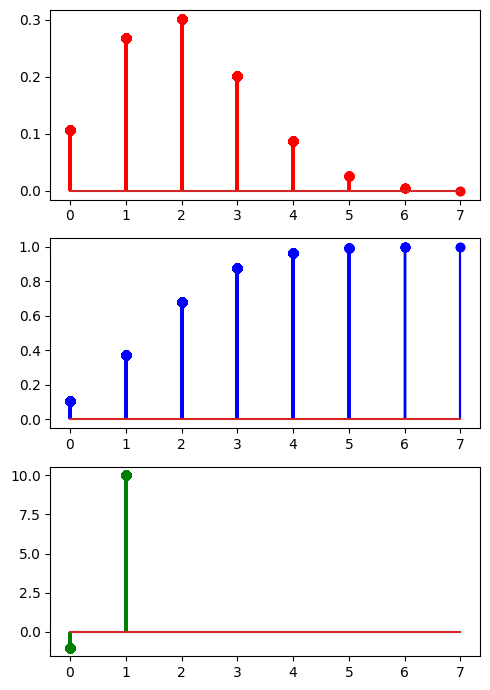

In [6]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

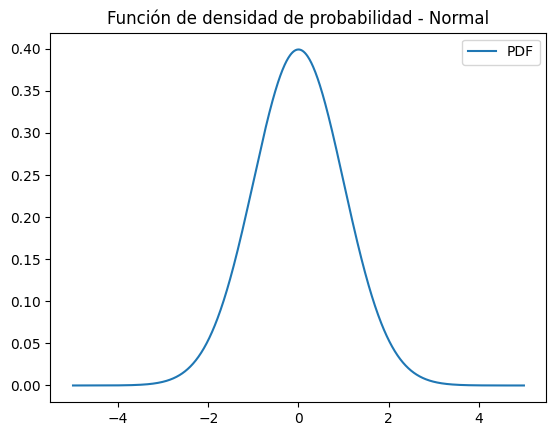

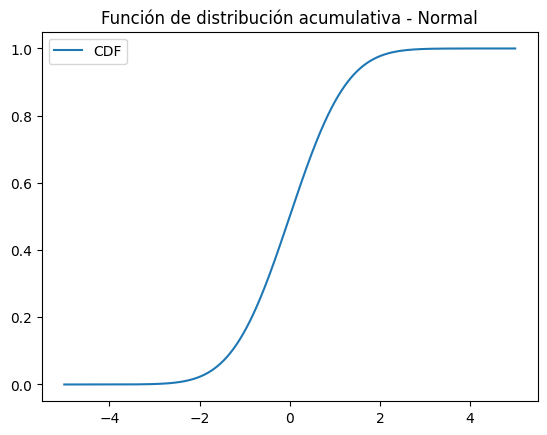

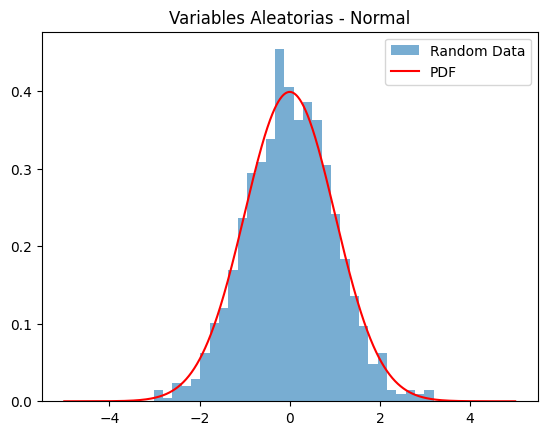

In [7]:
# TODO
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt


def dnorm(x, mu=0, sigma=1):
    result = norm.pdf(x, loc=mu, scale=sigma)
    return result

def pnorm(q, mu=0, sigma=1):
    result = norm.cdf(q, loc=mu, scale=sigma)
    return result

def qnorm(p, mu=0, sigma=1):
    result = norm.ppf(p, loc=mu, scale=sigma)
    return result

def rnorm(n, mu=0, sigma=1):
    result = norm.rvs(loc=mu, scale=sigma, size=n)
    return result

x = np.linspace(-5, 5, 1000)

# Función de densidad de probabilidad (PDF)
plt.plot(x, dnorm(x), label='PDF')
plt.title('Función de densidad de probabilidad - Normal')
plt.legend()
plt.show()

# Función de distribución acumulativa (CDF)
plt.plot(x, pnorm(x), label='CDF')
plt.title('Función de distribución acumulativa - Normal')
plt.legend()
plt.show()

# Variables aleatorias generadas
random_data = rnorm(1000)
plt.hist(random_data, bins=30, density=True, label='Random Data', alpha=0.6)
plt.plot(x, dnorm(x), label='PDF', color='red')
plt.title('Variables Aleatorias - Normal')
plt.legend()
plt.show()

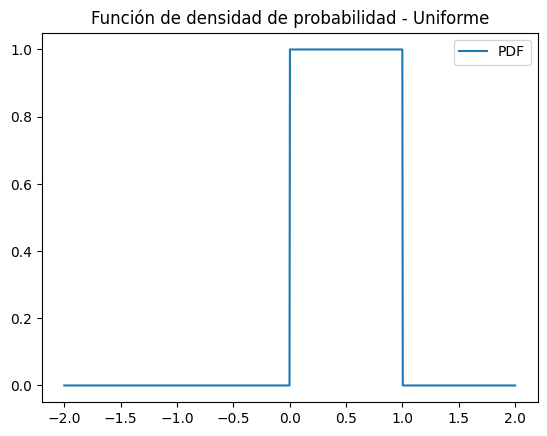

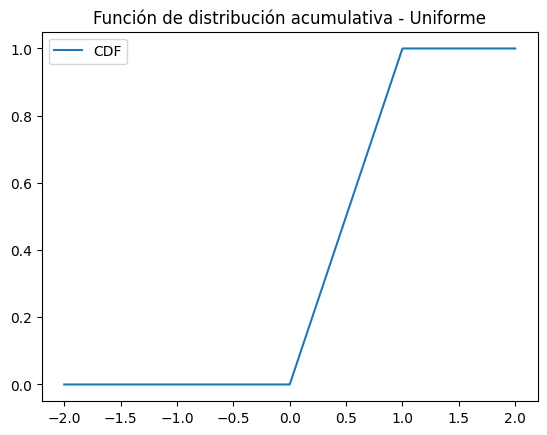

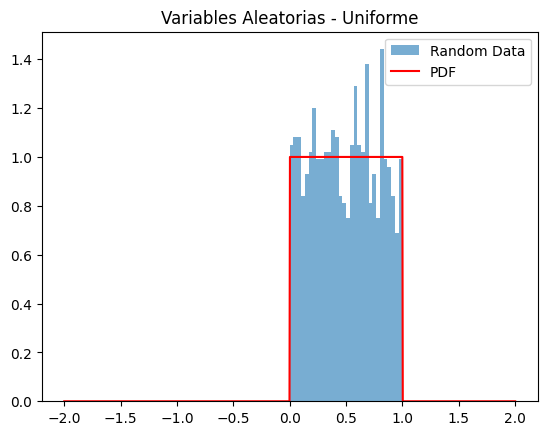

In [8]:
from scipy.stats import uniform

def dunif(x, loc=0, scale=1):
    result = uniform.pdf(x, loc=loc, scale=scale)
    return result

def punif(q, loc=0, scale=1):
    result = uniform.cdf(q, loc=loc, scale=scale)
    return result

def qunif(p, loc=0, scale=1):
    result = uniform.ppf(p, loc=loc, scale=scale)
    return result

def runif(n, loc=0, scale=1):
    result = uniform.rvs(loc=loc, scale=scale, size=n)
    return result

x = np.linspace(-2, 2, 1000)

# Función de densidad de probabilidad (PDF)
plt.plot(x, dunif(x), label='PDF')
plt.title('Función de densidad de probabilidad - Uniforme')
plt.legend()
plt.show()

# Función de distribución acumulativa (CDF)
plt.plot(x, punif(x), label='CDF')
plt.title('Función de distribución acumulativa - Uniforme')
plt.legend()
plt.show()

# Variables aleatorias generada
random_data = runif(1000)
plt.hist(random_data, bins=30, density=True, label='Random Data', alpha=0.6)
plt.plot(x, dunif(x), label='PDF', color='red')
plt.title('Variables Aleatorias - Uniforme')
plt.legend()
plt.show()





